In [1]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pip install split-folders

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
########### splitting data ############
import splitfolders
splitfolders.ratio('/kaggle/input/audataset/AugmentedAlzheimerDataset', output="Inputs", seed=1345, ratio=(0.7,0.2,0.1))# seed was 1345
SAMPLE_PER_CATEGORY = 200
SEED = 42
WIDTH = 128
HEIGHT = 128
DEPTH = 3
INPUT_SHAPE = (WIDTH, HEIGHT, DEPTH)

Copying files: 33984 files [03:37, 155.97 files/s]


In [4]:
# Paths
train_dir = '/kaggle/working/Inputs/train'  # Set path to train directory
test_dir = '/kaggle/working/Inputs/test'  # Set path to test directory

# Hyperparameters
batch_size = 32
epochs = 50
dropout_rate = 0.2
image_size = (128, 128)

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 19032 images belonging to 4 classes.
Found 4756 images belonging to 4 classes.
Found 3400 images belonging to 4 classes.


In [5]:

# Model Definition
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(128,128, 3))
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(dropout_rate),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]


71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732003744.687788     124 service.cc:145] XLA service 0x7d3a0c003690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732003744.687842     124 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732003744.687849     124 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/595 ━━━━━━━━━━━━━━━━━━━━ 32s 55ms/step - accuracy: 0.2344 - loss: 1.4666    

I0000 00:00:1732003792.409226     124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


595/595 ━━━━━━━━━━━━━━━━━━━━ 223s 262ms/step - accuracy: 0.2674 - loss: 1.3981 - val_accuracy: 0.2826 - val_loss: 1.3812 - learning_rate: 0.0010
Epoch 2/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 99s 165ms/step - accuracy: 0.2769 - loss: 1.3956 - val_accuracy: 0.2637 - val_loss: 1.3910 - learning_rate: 0.0010
Epoch 3/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 100s 166ms/step - accuracy: 0.2732 - loss: 1.3923 - val_accuracy: 0.2637 - val_loss: 1.3805 - learning_rate: 0.0010
Epoch 4/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 99s 164ms/step - accuracy: 0.2682 - loss: 1.3941 - val_accuracy: 0.2826 - val_loss: 1.3764 - learning_rate: 0.0010
Epoch 5/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 100s 166ms/step - accuracy: 0.2685 - loss: 1.3926 - val_accuracy: 0.2637 - val_loss: 1.4033 - learning_rate: 0.0010
Epoch 6/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 99s 164ms/step - accuracy: 0.2704 - loss: 1.3956 - val_accuracy: 0.2826 - val_loss: 1.3829 - learning_rate: 0.0010
Epoch 7/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 100s 167ms/step - accuracy: 0.2720 - l

In [7]:
# Evaluation
train_loss, train_acc = model.evaluate(train_generator, verbose=0)
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f"Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.29, Test Accuracy: 0.31


In [8]:
# Classification Report and Confusion Matrix
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

107/107 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.28      0.30      0.29       896
ModerateDemented       0.00      0.00      0.00       648
     NonDemented       0.32      0.82      0.46       960
VeryMildDemented       0.00      0.00      0.00       896

        accuracy                           0.31      3400
       macro avg       0.15      0.28      0.19      3400
    weighted avg       0.16      0.31      0.21      3400



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


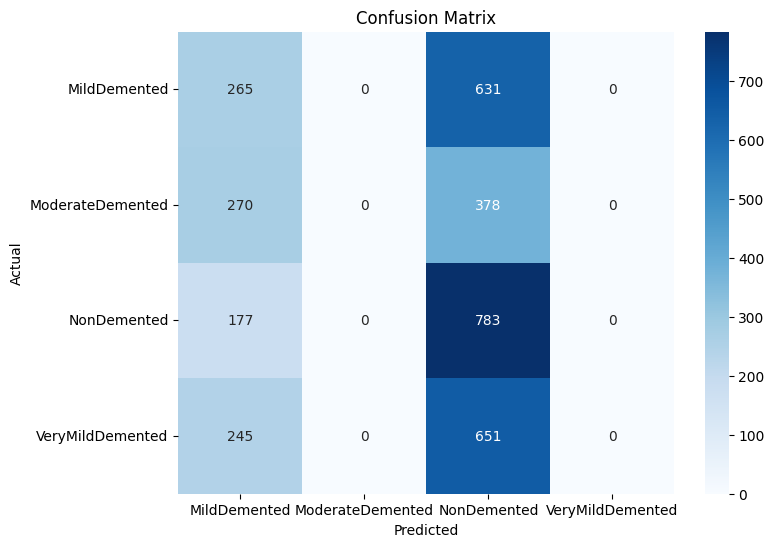

In [9]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

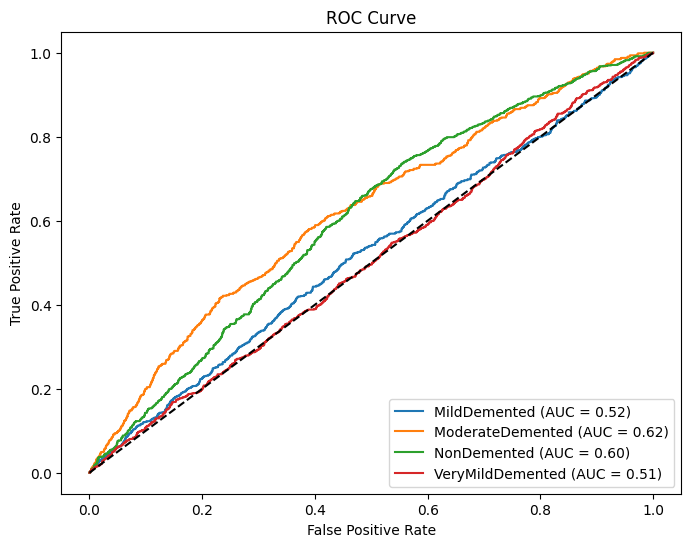

In [10]:
# ROC Curve and AUC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

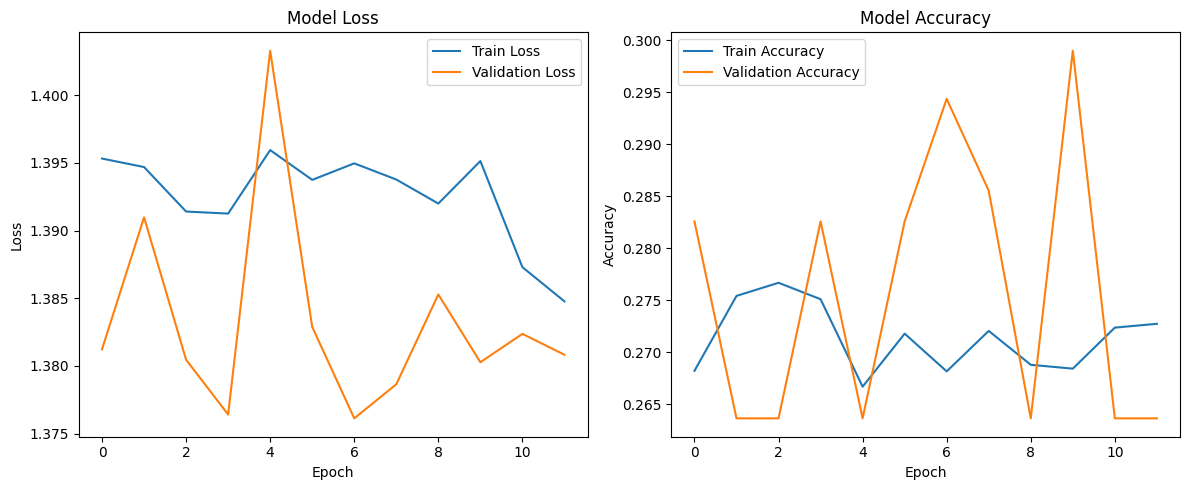

In [11]:
# Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()